In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('bodyfat.csv')
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
# checking max values of the attributes
df.loc[df['BodyFat'].idxmax()]

Density      0.995
BodyFat     47.500
Age         51.000
Weight     219.000
Height      64.000
Neck        41.200
Chest      119.800
Abdomen    122.100
Hip        112.800
Thigh       62.500
Knee        36.900
Ankle       23.600
Biceps      34.700
Forearm     29.100
Wrist       18.400
Name: 215, dtype: float64

In [ ]:
#checking min values of the attributes
df.loc[df['BodyFat'].idxmin()]

Density      1.1089
BodyFat      0.0000
Age         40.0000
Weight     118.5000
Height      68.0000
Neck        33.8000
Chest       79.3000
Abdomen     69.4000
Hip         85.0000
Thigh       47.2000
Knee        33.5000
Ankle       20.2000
Biceps      27.7000
Forearm     24.6000
Wrist       16.5000
Name: 181, dtype: float64

In [ ]:
# scaling the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [ ]:
df_scaled

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.665496,0.258947,0.016949,0.146127,0.792746,0.253731,0.242531,0.200762,0.151515,0.294264,0.267081,0.189189,0.356436,0.460432,0.232143
1,0.792801,0.128421,0.000000,0.223789,0.886010,0.368159,0.251318,0.172808,0.218501,0.286783,0.267081,0.290541,0.282178,0.568345,0.428571
2,0.407375,0.532632,0.000000,0.145105,0.761658,0.144279,0.289982,0.235070,0.226475,0.309227,0.366460,0.331081,0.198020,0.302158,0.142857
3,0.703248,0.218947,0.067797,0.270795,0.886010,0.313433,0.395431,0.216010,0.258373,0.321696,0.267081,0.250000,0.376238,0.604317,0.428571
4,0.342406,0.604211,0.033898,0.268751,0.865285,0.164179,0.316344,0.388818,0.269537,0.399002,0.571429,0.331081,0.366337,0.482014,0.339286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.690079,0.231579,0.813559,0.064378,0.777202,0.189055,0.173989,0.180432,0.060606,0.059850,0.111801,0.162162,0.039604,0.338129,0.482143
248,0.251097,0.707368,0.847458,0.337216,0.834197,0.487562,0.513181,0.452351,0.311005,0.309227,0.484472,0.277027,0.514851,0.546763,0.767857
249,0.331870,0.616842,0.847458,0.278970,0.756477,0.388060,0.558875,0.534943,0.266348,0.326683,0.267081,0.162162,0.321782,0.446043,0.392857
250,0.394205,0.547368,0.847458,0.295320,0.849741,0.388060,0.509666,0.405337,0.204147,0.219451,0.534161,0.243243,0.282178,0.604317,0.714286


1. Perform experiments using (70,15,15) split and tabulate the performance in terms of RMSE
for the following Hyper parameters : 

In [ ]:
X = df_scaled.drop(['BodyFat'], axis=1)
y = df_scaled['BodyFat']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# declaring global variables
X_train.shape
all_keys = []
all_evals = []

First Model (Single Layer) : 

In [ ]:
# 1 hidden layer with 128 nodes and sigmoid activation function
def FirstModelSigmoid(epoch, lr, reg):

  if reg=='no':
    model1_sigmoid = tf.keras.Sequential()
    model1_sigmoid.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model1_sigmoid.add(tf.keras.layers.Dense(128, activation="sigmoid", name="HiddenLayer1"))
    model1_sigmoid.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()

    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model1_sigmoid.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model1 = model1_sigmoid.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model1_sigmoid.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:1, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:no activ:sigmoid')
    all_evals.append(evals[1])

  elif reg=='yes':
    # L1 regularization
    model2_sigmoid_reg = tf.keras.Sequential()
    model2_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="sigmoid", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l1()))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model2 = model2_sigmoid_reg.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid_reg.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:1, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:l1 activ:sigmoid')
    all_evals.append(evals[1])

    # L2 regularization
    model3_sigmoid_reg = tf.keras.Sequential()
    model3_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="sigmoid", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l2()))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model3_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model3 = model3_sigmoid_reg.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid_reg.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:1, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:l2 activ:sigmoid')
    all_evals.append(evals[1])


Training for all models with hidden layers: 1, nodes: 128, activation function: sigmoid

In [ ]:
learning_rate = [1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
epochs = [10,20,30,40]
reg = ['no', 'yes']

for i in epochs:
  for j in learning_rate:
    for k in reg:
      FirstModelSigmoid(i, j, k)

Epoch 1/10
6/6 [==============================] - 1s 33ms/step - loss: 888.8652 - root_mean_squared_error: 29.8138 - val_loss: 5.3341 - val_root_mean_squared_error: 2.3096
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 8.6884 - root_mean_squared_error: 2.9476 - val_loss: 12.3894 - val_root_mean_squared_error: 3.5199
Epoch 3/10
6/6 [==============================] - 0s 6ms/step - loss: 12.8730 - root_mean_squared_error: 3.5879 - val_loss: 12.1638 - val_root_mean_squared_error: 3.4877
Epoch 4/10
6/6 [==============================] - 0s 6ms/step - loss: 10.6191 - root_mean_squared_error: 3.2587 - val_loss: 7.7094 - val_root_mean_squared_error: 2.7766
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - loss: 5.8509 - root_mean_squared_error: 2.4189 - val_loss: 3.2044 - val_root_mean_squared_error: 1.7901
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 2.0594 - root_mean_squared_error: 1.4351 - val_loss: 0.6897 - val_root_mean_square

In [ ]:
# 1 hidden layer with 128 nodes and relu activation function
def FirstModelRelu(epoch, lr, reg):
  if reg=='no':
    model1_relu = tf.keras.Sequential()
    model1_relu.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model1_relu.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1"))
    model1_relu.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()

    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model1_relu.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model1 = model1_relu.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model1_relu.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:1, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:no activ:relu')
    all_evals.append(evals[1])

  elif reg=='yes':
    # L1 regularization
    model2_sigmoid_reg = tf.keras.Sequential()
    model2_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l1()))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()
    print('L1 REGULARIZATION')
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model2 = model2_sigmoid_reg.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid_reg.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:1, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:l1 activ:relu')
    all_evals.append(evals[1])

    # L2 regularization
    model3_sigmoid_reg = tf.keras.Sequential()
    model3_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l2()))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()
    print('L2 REGULARIZATION')
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model3_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model3 = model3_sigmoid_reg.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid_reg.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:1, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:l2 activ:relu')
    all_evals.append(evals[1])


Training for all models with hidden layers: 1, nodes: 128, activation function: relu

In [ ]:
for i in epochs:
  for j in learning_rate:
    for k in reg:
      FirstModelRelu(i, j, k)

Epoch 1/10
6/6 [==============================] - 1s 46ms/step - loss: 17393.9492 - root_mean_squared_error: 131.8861 - val_loss: 4.1370 - val_root_mean_squared_error: 2.0340
Epoch 2/10
6/6 [==============================] - 0s 10ms/step - loss: 7.1579 - root_mean_squared_error: 2.6754 - val_loss: 11.2774 - val_root_mean_squared_error: 3.3582
Epoch 3/10
6/6 [==============================] - 0s 10ms/step - loss: 13.1627 - root_mean_squared_error: 3.6280 - val_loss: 15.2824 - val_root_mean_squared_error: 3.9093
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: 15.9291 - root_mean_squared_error: 3.9911 - val_loss: 16.2819 - val_root_mean_squared_error: 4.0351
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 16.0469 - root_mean_squared_error: 4.0059 - val_loss: 15.2410 - val_root_mean_squared_error: 3.9040
Epoch 6/10
6/6 [==============================] - 0s 9ms/step - loss: 14.5052 - root_mean_squared_error: 3.8086 - val_loss: 13.0912 - val_root_

Second Model (2 Layers):

In [ ]:
# 2 hidden layers with 128 and 64 nodes and sigmoid activation function
def SecondModelSigmoid(epoch, lr, reg):
  if reg=='no':
    model2_sigmoid = tf.keras.Sequential()
    model2_sigmoid.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model2_sigmoid.add(tf.keras.layers.Dense(128, activation="sigmoid", name="HiddenLayer1"))
    model2_sigmoid.add(tf.keras.layers.Dense(64, activation="sigmoid", name="HiddenLayer2"))
    model2_sigmoid.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()

    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2_sigmoid.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model1 = model2_sigmoid.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:2, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:no activ:sigmoid')
    all_evals.append(evals[1])

  elif reg=='yes':
    # L1 regularization
    model2_sigmoid_reg = tf.keras.Sequential()
    model2_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="sigmoid", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l1()))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(64, activation="sigmoid", name="HiddenLayer2", kernel_regularizer=tf.keras.regularizers.l1()))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()
    print('L1 REGULARIZATION')
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model2 = model2_sigmoid_reg.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid_reg.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:2, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:l1 activ:sigmoid')
    all_evals.append(evals[1])

    # L2 regularization
    model3_sigmoid_reg = tf.keras.Sequential()
    model3_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="sigmoid", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l2()))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(64, activation="sigmoid", name="HiddenLayer2", kernel_regularizer=tf.keras.regularizers.l2()))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()
    print('L2 REGULARIZATION')
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model3_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model3 = model3_sigmoid_reg.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model3_sigmoid_reg.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:2, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:l2 activ:sigmoid')
    all_evals.append(evals[1])


Training for all models with hidden layers: 2, nodes: 128 and 64, activation function: sigmoid

In [ ]:
for i in epochs:
  for j in learning_rate:
    for k in reg:
      SecondModelSigmoid(i, j, k)

Epoch 1/10
6/6 [==============================] - 1s 48ms/step - loss: 404.9416 - root_mean_squared_error: 20.1232 - val_loss: 313.6102 - val_root_mean_squared_error: 17.7090
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 171.8204 - root_mean_squared_error: 13.1080 - val_loss: 154.0992 - val_root_mean_squared_error: 12.4137
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 81.9077 - root_mean_squared_error: 9.0503 - val_loss: 103.0557 - val_root_mean_squared_error: 10.1516
Epoch 4/10
6/6 [==============================] - 0s 9ms/step - loss: 45.8231 - root_mean_squared_error: 6.7693 - val_loss: 64.3284 - val_root_mean_squared_error: 8.0205
Epoch 5/10
6/6 [==============================] - 0s 10ms/step - loss: 26.3527 - root_mean_squared_error: 5.1335 - val_loss: 37.6660 - val_root_mean_squared_error: 6.1373
Epoch 6/10
6/6 [==============================] - 0s 10ms/step - loss: 15.3389 - root_mean_squared_error: 3.9165 - val_loss: 20.9226 - val

In [ ]:
# 2 hidden layers with 128 and 64 nodes and relu activation function
def SecondModelRelu(epoch, lr, reg):
  if reg=='no':
    model2_sigmoid = tf.keras.Sequential()
    model2_sigmoid.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model2_sigmoid.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1"))
    model2_sigmoid.add(tf.keras.layers.Dense(64, activation="relu", name="HiddenLayer2"))
    model2_sigmoid.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()

    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2_sigmoid.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model1 = model2_sigmoid.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:2, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:no activ:relu')
    all_evals.append(evals[1])

  elif reg=='yes':
    # L1 regularization
    model2_sigmoid_reg = tf.keras.Sequential()
    model2_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l1()))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(64, activation="relu", name="HiddenLayer2", kernel_regularizer=tf.keras.regularizers.l1()))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()
    print('L1 REGULARIZATION')
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model2 = model2_sigmoid_reg.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid_reg.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:2, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:l1 activ:relu')
    all_evals.append(evals[1])

    # L2 regularization
    model3_sigmoid_reg = tf.keras.Sequential()
    model3_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l2()))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(64, activation="relu", name="HiddenLayer2", kernel_regularizer=tf.keras.regularizers.l2()))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()
    print('L2 REGULARIZATION')
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model3_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model3 = model3_sigmoid_reg.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model3_sigmoid_reg.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:2, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:l2 activ:relu')
    all_evals.append(evals[1])


Training for all models with hidden layers: 2, nodes: 128 and 64, activation function: relu

In [ ]:
for i in epochs:
  for j in learning_rate:
    for k in reg:
      SecondModelRelu(i, j, k)

Epoch 1/10
6/6 [==============================] - 1s 45ms/step - loss: 18315886.0000 - root_mean_squared_error: 4279.7061 - val_loss: 202.4184 - val_root_mean_squared_error: 14.2274
Epoch 2/10
6/6 [==============================] - 0s 10ms/step - loss: 3457.1609 - root_mean_squared_error: 58.7976 - val_loss: 55.9652 - val_root_mean_squared_error: 7.4810
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 764.9177 - root_mean_squared_error: 27.6571 - val_loss: 575.0333 - val_root_mean_squared_error: 23.9799
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: 456.0609 - root_mean_squared_error: 21.3556 - val_loss: 33.4355 - val_root_mean_squared_error: 5.7823
Epoch 5/10
6/6 [==============================] - 0s 13ms/step - loss: 16.8690 - root_mean_squared_error: 4.1072 - val_loss: 7.1513 - val_root_mean_squared_error: 2.6742
Epoch 6/10
6/6 [==============================] - 0s 11ms/step - loss: 3.4985 - root_mean_squared_error: 1.8704 - val_loss: 1.1

Third Model (3 Layers):

In [ ]:
# 3 hidden layers with 128, 64 and 32 nodes and sigmoid activation function
def ThirdModelSigmoid(epoch, lr, reg):
  if reg=='no':
    model2_sigmoid = tf.keras.Sequential()
    model2_sigmoid.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model2_sigmoid.add(tf.keras.layers.Dense(128, activation="sigmoid", name="HiddenLayer1"))
    model2_sigmoid.add(tf.keras.layers.Dense(64, activation="sigmoid", name="HiddenLayer2"))
    model2_sigmoid.add(tf.keras.layers.Dense(32, activation="sigmoid", name="HiddenLayer3"))
    model2_sigmoid.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()

    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2_sigmoid.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model1 = model2_sigmoid.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:3, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:no activ:sigmoid')
    all_evals.append(evals[1])

  elif reg=='yes':
    # L1 regularization
    model2_sigmoid_reg = tf.keras.Sequential()
    model2_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="sigmoid", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l1()))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(64, activation="sigmoid", name="HiddenLayer2", kernel_regularizer=tf.keras.regularizers.l1()))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(32, activation="sigmoid", name="HiddenLayer3", kernel_regularizer=tf.keras.regularizers.l1()))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()
    print('L1 REGULARIZATION')
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model2 = model2_sigmoid_reg.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid_reg.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:3, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:l1 activ:sigmoid')
    all_evals.append(evals[1])

    # L2 regularization
    model3_sigmoid_reg = tf.keras.Sequential()
    model3_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="sigmoid", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l2()))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(64, activation="sigmoid", name="HiddenLayer2", kernel_regularizer=tf.keras.regularizers.l2()))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(32, activation="sigmoid", name="HiddenLayer3", kernel_regularizer=tf.keras.regularizers.l2()))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()
    print('L1 REGULARIZATION')
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model3_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    #epochs = [10,20,30,40]
    learning_rates = []
    history_model3 = model3_sigmoid_reg.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid_reg.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:3, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:l2 activ:sigmoid')
    all_evals.append(evals[1])

Training and visualisations for all models with hidden layers: 3, nodes: 128 and 64 and 32, activation function: sigmoid

In [ ]:
for i in epochs:
  for j in learning_rate:
    for k in reg:
      ThirdModelSigmoid(i, j, k)

Epoch 1/10
6/6 [==============================] - 1s 124ms/step - loss: 88.3892 - root_mean_squared_error: 9.4016 - val_loss: 69.1949 - val_root_mean_squared_error: 8.3183
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 70.6697 - root_mean_squared_error: 8.4065 - val_loss: 6.8786 - val_root_mean_squared_error: 2.6227
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 33.8683 - root_mean_squared_error: 5.8197 - val_loss: 3.1566 - val_root_mean_squared_error: 1.7767
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 12.8144 - root_mean_squared_error: 3.5797 - val_loss: 12.6751 - val_root_mean_squared_error: 3.5602
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 6.3196 - root_mean_squared_error: 2.5139 - val_loss: 11.4784 - val_root_mean_squared_error: 3.3880
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 4.4149 - root_mean_squared_error: 2.1012 - val_loss: 5.8188 - val_root_mean_squar

In [ ]:
# 3 hidden layers with 128, 64 and 32 nodes and relu activation function
def ThirdModelRelu(epoch, lr, reg):
  if reg == 'no':
    model2_sigmoid = tf.keras.Sequential()
    model2_sigmoid.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model2_sigmoid.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1"))
    model2_sigmoid.add(tf.keras.layers.Dense(64, activation="relu", name="HiddenLayer2"))
    model2_sigmoid.add(tf.keras.layers.Dense(32, activation="relu", name="HiddenLayer3"))
    model2_sigmoid.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()

    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2_sigmoid.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model1 = model2_sigmoid.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:3, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:no activ:relu')
    all_evals.append(evals[1])

  elif reg=='yes':
    # L1 regularization
    model2_sigmoid_reg = tf.keras.Sequential()
    model2_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l1()))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(64, activation="relu", name="HiddenLayer2", kernel_regularizer=tf.keras.regularizers.l1()))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(32, activation="relu", name="HiddenLayer3", kernel_regularizer=tf.keras.regularizers.l1()))
    model2_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()
    print('L1 REGULARIZATION')
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model2 = model2_sigmoid_reg.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid_reg.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:3, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:l1 activ:relu')
    all_evals.append(evals[1])

    # L2 regularization
    model3_sigmoid_reg = tf.keras.Sequential()
    model3_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l2()))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(64, activation="relu", name="HiddenLayer2", kernel_regularizer=tf.keras.regularizers.l2()))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(32, activation="relu", name="HiddenLayer3", kernel_regularizer=tf.keras.regularizers.l2()))
    model3_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
    #model1_sigmoid.summary()
    print('L1 REGULARIZATION')
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model3_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history_model3 = model3_sigmoid_reg.fit(X_train, y_train, epochs=epoch, validation_split=0.15)

    evals = model2_sigmoid_reg.evaluate(X_test, y_test)
    all_keys.append('HiddenLayer:3, epochs:'+str(epoch)+' lr:'+str(lr)+' reg:l2 activ:relu')
    all_evals.append(evals[1])

Training and visualisations for all models with hidden layers: 3, nodes: 128 and 64 and 32, activation function: relu

In [ ]:
for i in epochs:
  for j in learning_rate:
    for k in reg:
      ThirdModelRelu(i, j, k)

Epoch 1/10
6/6 [==============================] - 1s 53ms/step - loss: 1846260096.0000 - root_mean_squared_error: 42968.1289 - val_loss: 47.0636 - val_root_mean_squared_error: 6.8603
Epoch 2/10
6/6 [==============================] - 0s 10ms/step - loss: 21256.7148 - root_mean_squared_error: 145.7968 - val_loss: 10.8433 - val_root_mean_squared_error: 3.2929
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 76.2195 - root_mean_squared_error: 8.7304 - val_loss: 16.1052 - val_root_mean_squared_error: 4.0131
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: 17.6178 - root_mean_squared_error: 4.1974 - val_loss: 19.5107 - val_root_mean_squared_error: 4.4171
Epoch 5/10
6/6 [==============================] - 0s 9ms/step - loss: 20.4640 - root_mean_squared_error: 4.5237 - val_loss: 21.5936 - val_root_mean_squared_error: 4.6469
Epoch 6/10
6/6 [==============================] - 0s 10ms/step - loss: 22.1847 - root_mean_squared_error: 4.7101 - val_loss: 22.82

In [ ]:
df_keys = pd.DataFrame(all_keys, columns=['Parameters'])
df_keys

,Parameters
0,"HiddenLayer:1, epochs:10 lr:1 reg:no activ:sig..."
1,"HiddenLayer:1, epochs:10 lr:1 reg:l1 activ:sig..."
2,"HiddenLayer:1, epochs:10 lr:1 reg:l2 activ:sig..."
3,"HiddenLayer:1, epochs:10 lr:0.3 reg:no activ:s..."
4,"HiddenLayer:1, epochs:10 lr:0.3 reg:l1 activ:s..."
...,...
571,"HiddenLayer:3, epochs:40 lr:0.0001 reg:l1 acti..."
572,"HiddenLayer:3, epochs:40 lr:0.0001 reg:l2 acti..."
573,"HiddenLayer:3, epochs:40 lr:1e-05 reg:no activ..."
574,"HiddenLayer:3, epochs:40 lr:1e-05 reg:l1 activ..."


In [ ]:
df_evals = pd.DataFrame(all_evals, columns=['rmse'])
df_evals

,rmse
0,0.510556
1,0.404422
2,0.404422
3,0.220583
4,0.356228
...,...
571,0.110403
572,0.110403
573,0.117592
574,0.218127


In [ ]:
df = pd.concat([df_keys, df_evals], axis=1)
df

,Parameters,rmse
0,"HiddenLayer:1, epochs:10 lr:1 reg:no activ:sig...",0.510556
1,"HiddenLayer:1, epochs:10 lr:1 reg:l1 activ:sig...",0.404422
2,"HiddenLayer:1, epochs:10 lr:1 reg:l2 activ:sig...",0.404422
3,"HiddenLayer:1, epochs:10 lr:0.3 reg:no activ:s...",0.220583
4,"HiddenLayer:1, epochs:10 lr:0.3 reg:l1 activ:s...",0.356228
...,...,...
571,"HiddenLayer:3, epochs:40 lr:0.0001 reg:l1 acti...",0.110403
572,"HiddenLayer:3, epochs:40 lr:0.0001 reg:l2 acti...",0.110403
573,"HiddenLayer:3, epochs:40 lr:1e-05 reg:no activ...",0.117592
574,"HiddenLayer:3, epochs:40 lr:1e-05 reg:l1 activ...",0.218127


In [ ]:
df_sorted = df.sort_values(by='rmse', ascending='False')
df_sorted

,Parameters,rmse
561,"HiddenLayer:3, epochs:40 lr:0.01 reg:no activ:...",0.017344
176,"HiddenLayer:1, epochs:40 lr:0.1 reg:l2 activ:relu",0.017536
175,"HiddenLayer:1, epochs:40 lr:0.1 reg:l1 activ:relu",0.017536
369,"HiddenLayer:2, epochs:40 lr:0.01 reg:no activ:...",0.018944
178,"HiddenLayer:1, epochs:40 lr:0.01 reg:l1 activ:...",0.021565
...,...,...
336,"HiddenLayer:2, epochs:30 lr:1 reg:no activ:relu",4.142331
290,"HiddenLayer:2, epochs:10 lr:1 reg:l2 activ:relu",4.151770
528,"HiddenLayer:3, epochs:30 lr:1 reg:no activ:relu",4.781254
504,"HiddenLayer:3, epochs:20 lr:1 reg:no activ:relu",4.808164


The best two models have the parameters:
- HiddenLayers:3, epochs:40 lr:0.01 reg:no activ:relu
- HiddenLayers:1, epochs:40 lr:0.1 reg:l2 activ:relu

---
Visualisations for the best 2 models:-

Epoch 1/40
6/6 [==============================] - 1s 60ms/step - loss: 0.0962 - root_mean_squared_error: 0.3101 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1810
Epoch 2/40
6/6 [==============================] - 0s 11ms/step - loss: 0.0278 - root_mean_squared_error: 0.1666 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1128
Epoch 3/40
6/6 [==============================] - 0s 16ms/step - loss: 0.0164 - root_mean_squared_error: 0.1280 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1022
Epoch 4/40
6/6 [==============================] - 0s 11ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1000
Epoch 5/40
6/6 [==============================] - 0s 15ms/step - loss: 0.0121 - root_mean_squared_error: 0.1102 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1345
Epoch 6/40
6/6 [==============================] - 0s 14ms/step - loss: 0.0111 - root_mean_squared_error: 0.1053 - val_loss: 0.0096 - val_root_mean_squared_

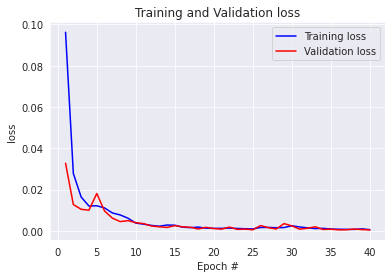

In [ ]:
# hidden layers:3, epochs:40, lr:0.01, activ:relu

model2_sigmoid = tf.keras.Sequential()
model2_sigmoid.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
model2_sigmoid.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1"))
model2_sigmoid.add(tf.keras.layers.Dense(64, activation="relu", name="HiddenLayer2"))
model2_sigmoid.add(tf.keras.layers.Dense(32, activation="relu", name="HiddenLayer3"))
model2_sigmoid.add(tf.keras.layers.Dense(1, name="OutputLayer"))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model2_sigmoid.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
history_model1 = model2_sigmoid.fit(X_train, y_train, epochs=40, validation_split=0.15)

sns.set_style("darkgrid")
#get the details form the history object
acc = history_model1.history['root_mean_squared_error']
val_acc = history_model1.history['val_root_mean_squared_error']
loss = history_model1.history['loss']
val_loss = history_model1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Epoch 1/40
6/6 [==============================] - 1s 184ms/step - loss: 9.4316 - root_mean_squared_error: 3.0048 - val_loss: 1.0584 - val_root_mean_squared_error: 0.5670
Epoch 2/40
6/6 [==============================] - 0s 13ms/step - loss: 1.1634 - root_mean_squared_error: 0.4706 - val_loss: 1.2375 - val_root_mean_squared_error: 0.2222
Epoch 3/40
6/6 [==============================] - 0s 13ms/step - loss: 1.3577 - root_mean_squared_error: 0.3075 - val_loss: 1.3407 - val_root_mean_squared_error: 0.1348
Epoch 4/40
6/6 [==============================] - 0s 10ms/step - loss: 1.3518 - root_mean_squared_error: 0.1763 - val_loss: 1.3124 - val_root_mean_squared_error: 0.1322
Epoch 5/40
6/6 [==============================] - 0s 11ms/step - loss: 1.2856 - root_mean_squared_error: 0.1510 - val_loss: 1.2205 - val_root_mean_squared_error: 0.1335
Epoch 6/40
6/6 [==============================] - 0s 12ms/step - loss: 1.1693 - root_mean_squared_error: 0.1409 - val_loss: 1.0737 - val_root_mean_squared

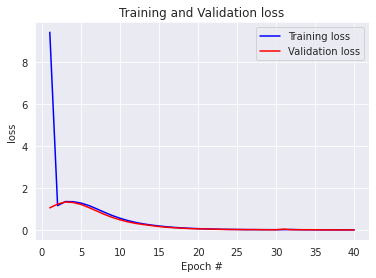

In [ ]:
# hidden layers:1, epochs:40, lr:0.1, regularization:l2, activ:relu

model3_sigmoid_reg = tf.keras.Sequential()
model3_sigmoid_reg.add(tf.keras.layers.InputLayer(input_shape=14, name="inputLayer"))
model3_sigmoid_reg.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1", kernel_regularizer=tf.keras.regularizers.l2()))
model3_sigmoid_reg.add(tf.keras.layers.Dense(1, name="OutputLayer"))
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model3_sigmoid_reg.compile(loss="mean_squared_error", optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
history_model2 = model3_sigmoid_reg.fit(X_train, y_train, epochs=40, validation_split=0.15)

sns.set_style("darkgrid")
#get the details form the history object
acc = history_model2.history['root_mean_squared_error']
val_acc = history_model2.history['val_root_mean_squared_error']
loss = history_model2.history['loss']
val_loss = history_model2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()